In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [5]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [6]:
data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [7]:
data['conversion'] = data['converted']/data['users_count']*100
data.head()

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


In [8]:
data.loc[data['group'] == 'A'][data['timestamp'] == '2017-01-05']

C:\Users\admin\AppData\Local\Temp\ipykernel_13408\2678201817.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.loc[data['group'] == 'A'][data['timestamp'] == '2017-01-05']


,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,12.322792


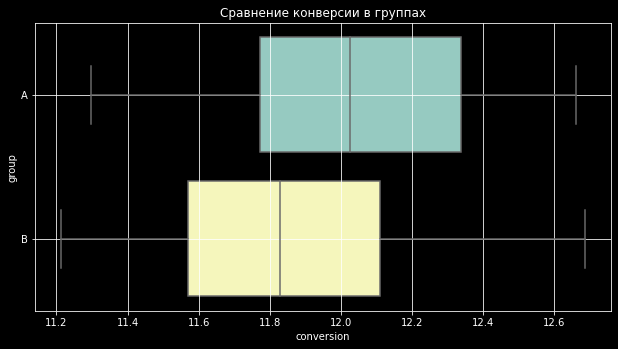

In [9]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_axes([1,1,1,1])

sns.boxplot(data=data, x='conversion', y='group', ax=ax)

ax.set_title('Сравнение конверсии в группах')

ax.grid()

In [10]:
conversion_piv = data.groupby('group')['conversion'].agg(['mean', 'median'])
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


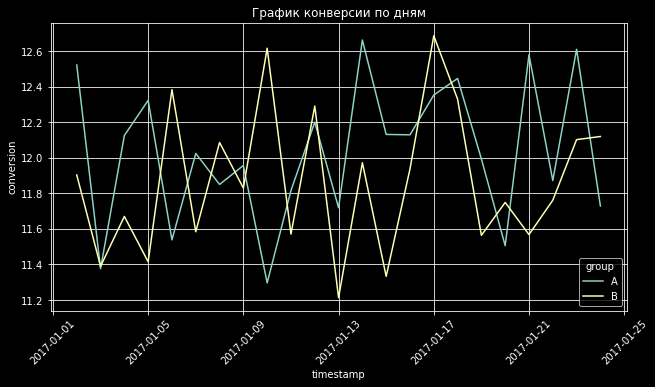

In [11]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(
    data=data,
    x='timestamp',
    y='conversion',
    hue='group',
    ax=ax
)
ax.set_title('График конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.grid()

In [12]:
data_a = data[data['group']=='A']
data_a.loc[:,'cum_users_count'] = data_a['users_count'].cumsum()
display(data_a[['timestamp','users_count','cum_users_count']].head())

C:\Users\admin\AppData\Local\Temp\ipykernel_13408\2166912610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_a.loc[:,'cum_users_count'] = data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [13]:
data['cum_users_count'] = data.groupby(['group'])['users_count'].cumsum()
data['cum_converted'] = data.groupby(['group'])['converted'].cumsum()
data['cum_conversion'] = data['cum_converted']/data['cum_users_count']*100

display(data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


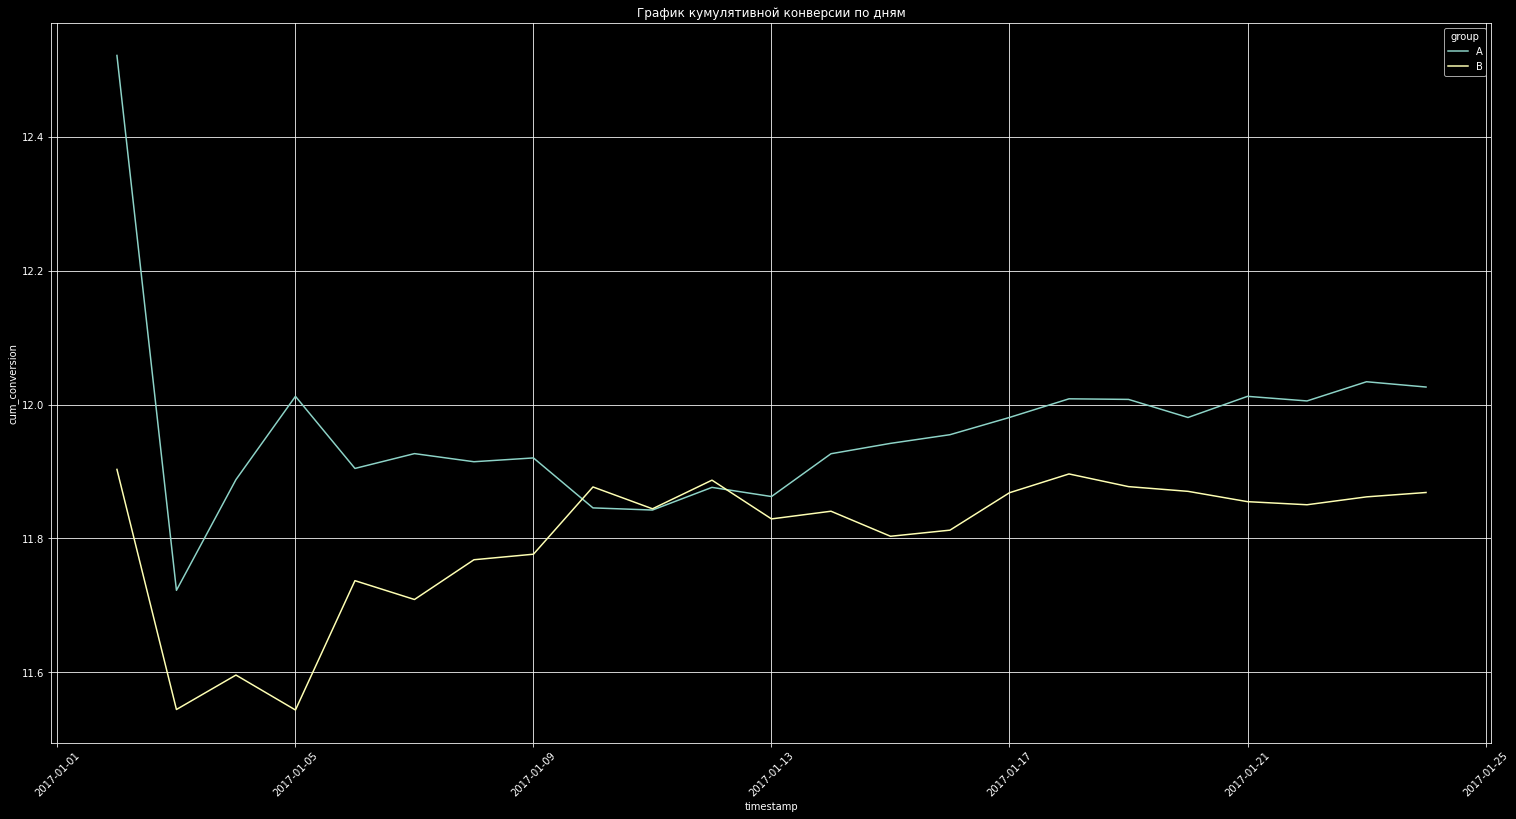

In [14]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(20, 10))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [15]:
rda = pd.read_csv('data/redesign_a.csv')
rdb = pd.read_csv('data/redesign_b.csv')

In [16]:
rda['date'] = pd.to_datetime(rda['date'], format='%Y-%m-%d')
rda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [17]:
rdad = rda.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
rdad.head()

,date,users_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [18]:
rdbd = rdb.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
rdbd.head()

,date,users_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [19]:
display(rdad.loc[rdad['date'] == '2020-11-8'])

,date,users_count,transactions,revenue
2,2020-11-08,3354,25,846051


In [20]:
rdad['cum_users_count'] = rdad['users_count'].cumsum()
rdad['cum_trans'] = rdad['transactions'].cumsum()
rdad['cum_revenue'] = rdad['revenue'].cumsum()
rdad['cum_conversion'] = rdad['cum_trans']/rdad['cum_users_count']*100
rdad['cum_mean_check'] = rdad['cum_revenue']/rdad['cum_trans']

rdbd['cum_users_count'] = rdbd['users_count'].cumsum()
rdbd['cum_trans'] = rdbd['transactions'].cumsum()
rdbd['cum_revenue'] = rdbd['revenue'].cumsum()
rdbd['cum_conversion'] = rdbd['cum_trans']/rdbd['cum_users_count']*100
rdbd['cum_mean_check'] = rdbd['cum_revenue']/rdbd['cum_trans']

display(rdad.head())
display(rdad['cum_conversion'].mean())
display(rdbd['cum_conversion'].mean())

,date,users_count,transactions,revenue,cum_users_count,cum_trans,cum_revenue,cum_conversion,cum_mean_check
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450


0.7127554606160045

0.7621783890588011

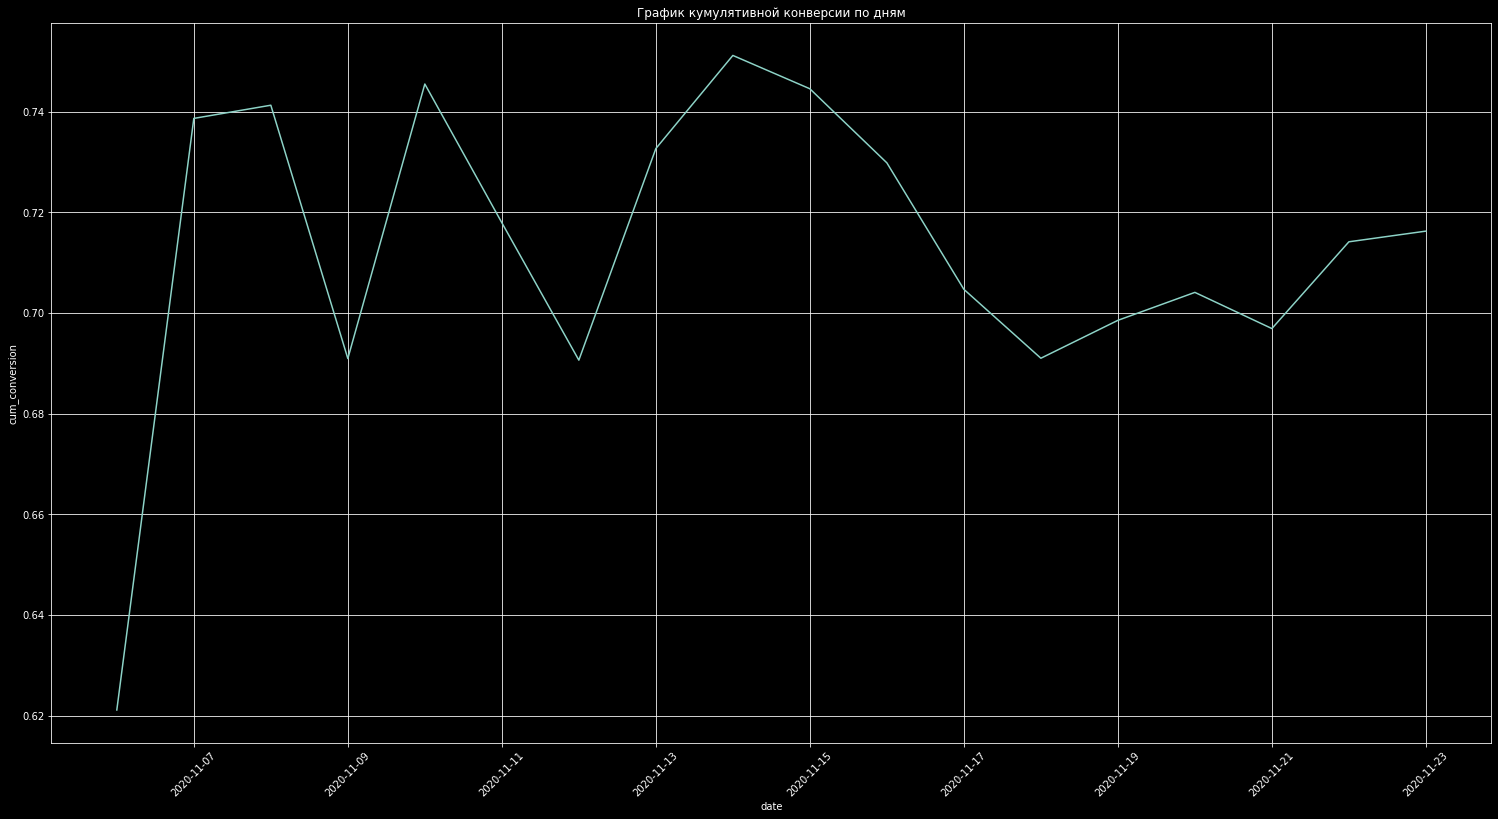

In [21]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(20, 10))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=rdad, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

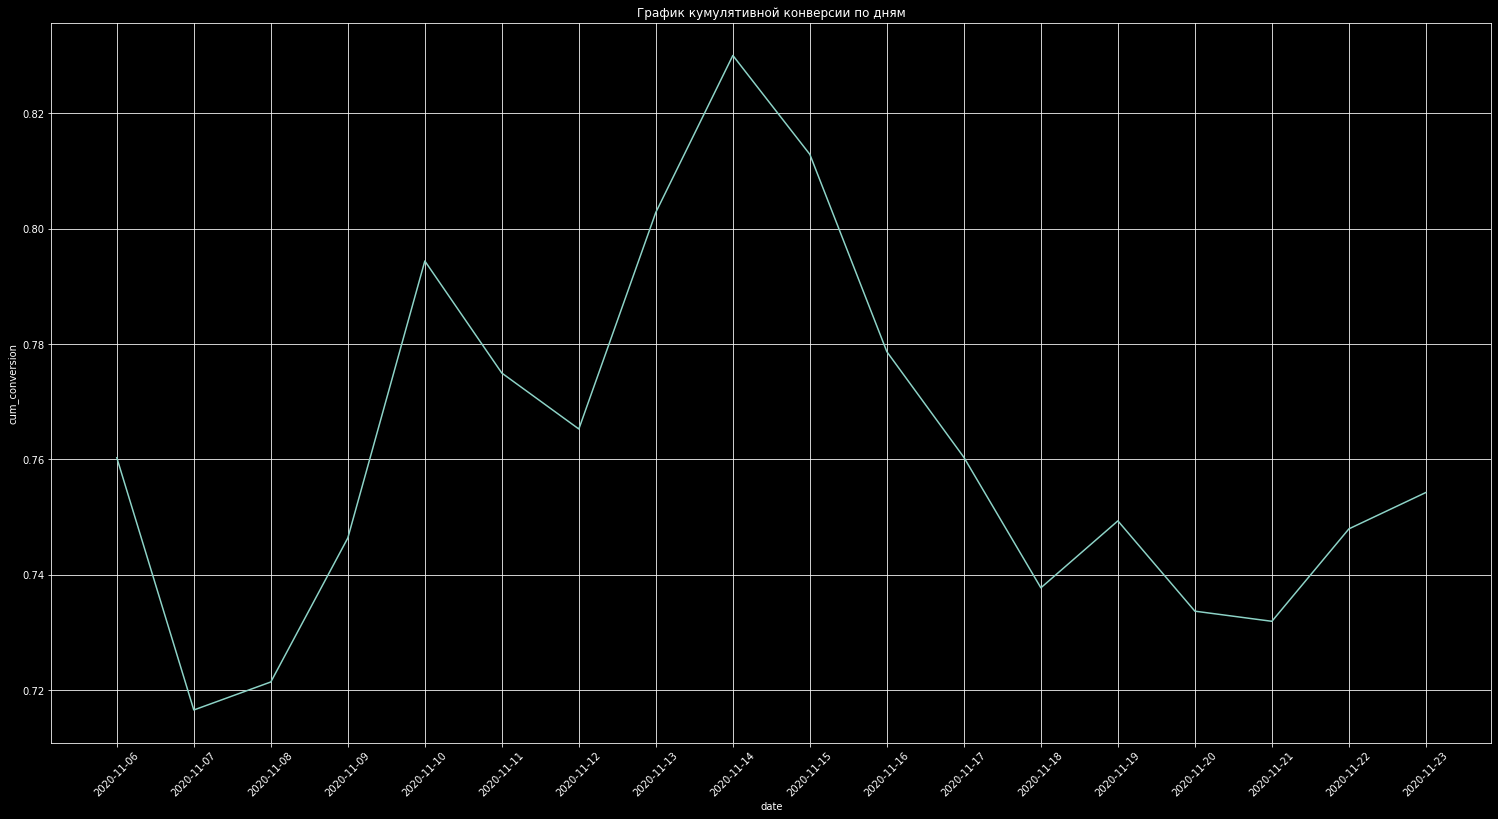

In [22]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(20, 10))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=rdbd, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

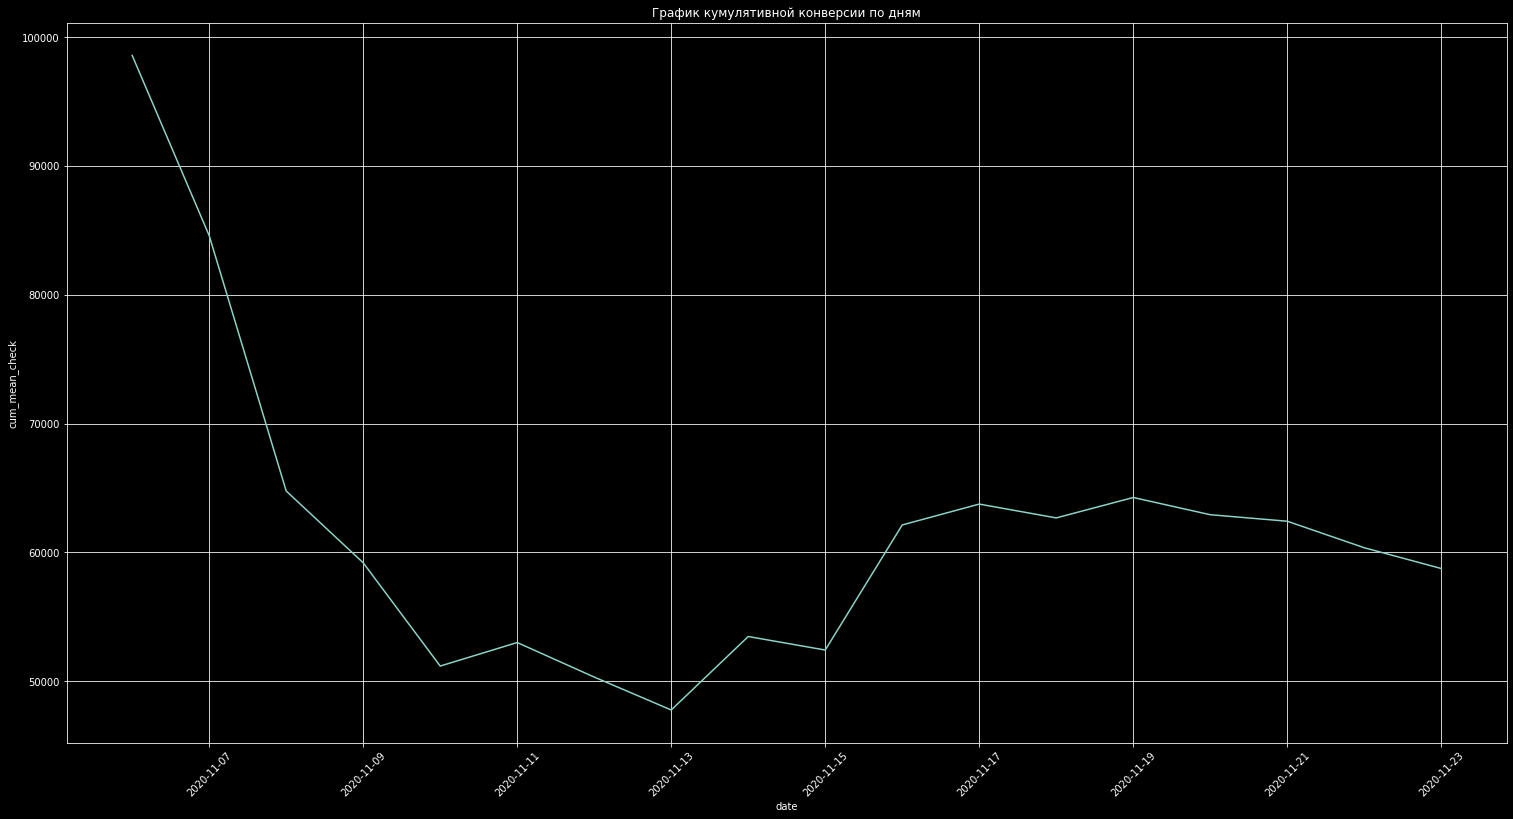

In [23]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(20, 10))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_check', data=rdad, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

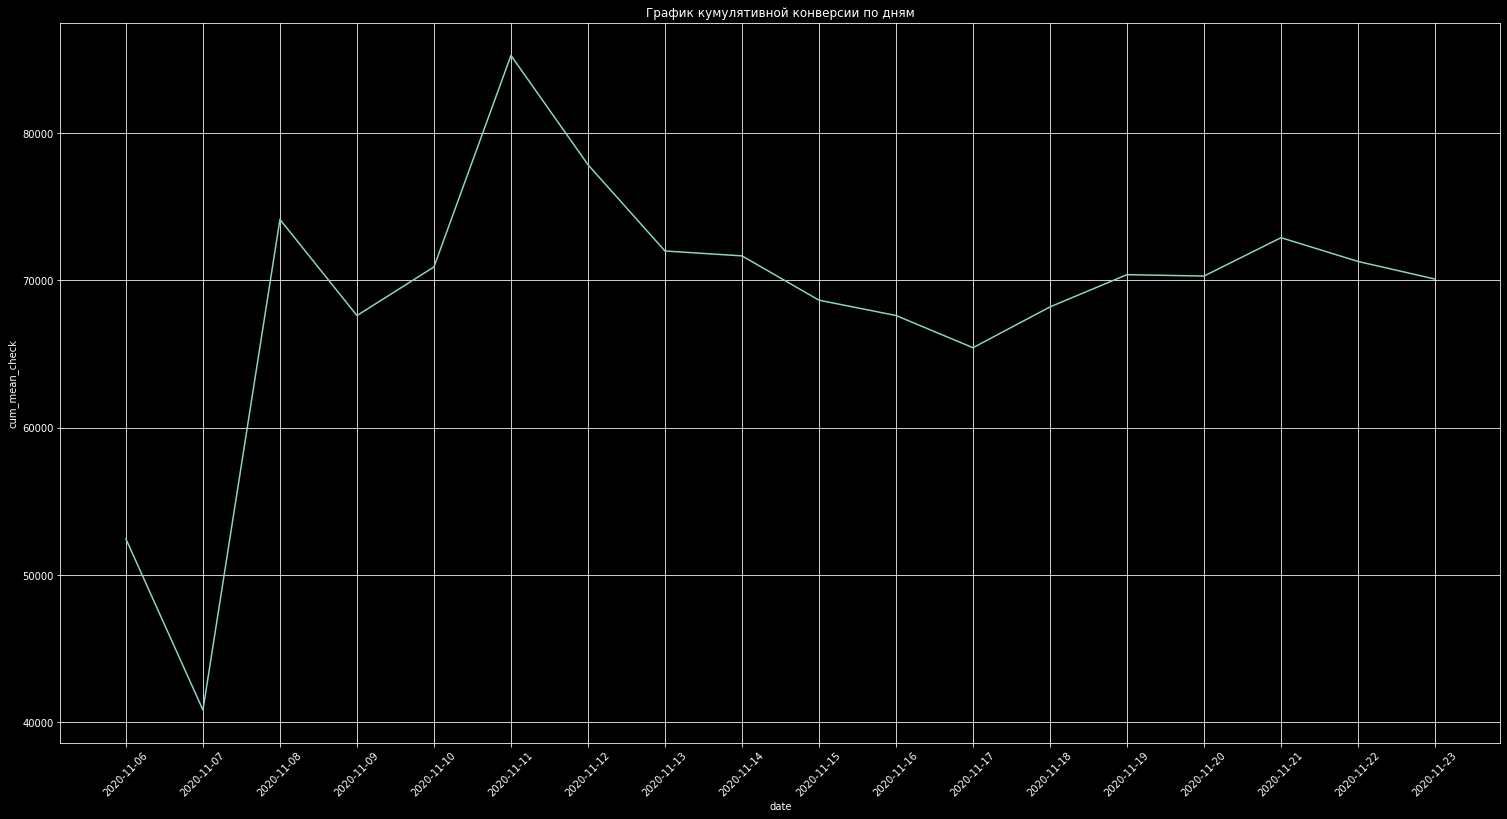

In [24]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(20, 10))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_check', data=rdbd, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [25]:
from statsmodels.stats.proportion import proportions_ztest

In [26]:
converted_data = ab_data.groupby('group')['converted'].agg(['sum', 'count'])
display(converted_data)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [27]:
H0 = 'Конверсии в группах A и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе В'
alpha = 0.05

_, p_value = proportions_ztest(
    count=converted_data['sum'],
    nobs=converted_data['count'],
    alternative='larger'
)

print('p-value', round(p_value, 2))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print('Принимаем нулевую гипотезу, {}'.format(H0))


p-value 0.1
Принимаем нулевую гипотезу, Конверсии в группах A и B равны


In [28]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


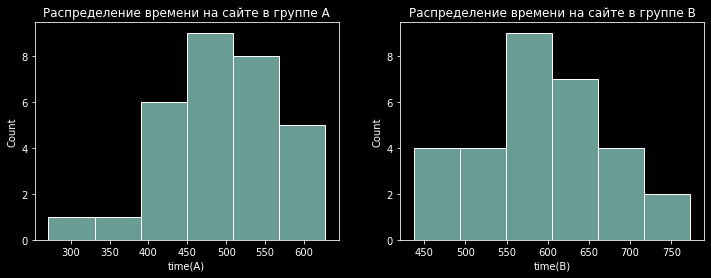

In [29]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [30]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


In [31]:
from scipy.stats import ttest_ind

H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе В'
alpha = 0.05

result = ttest_ind(
    a = time_data['time(A)'],
    b = time_data['time(B)'],
    alternative='less'
)
print('p-value:', round(result.pvalue, 2))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H0))
    print('Альтернативная гипотеза. Н1: {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу. {}'.format(H0))

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. Н1: Среднее время в группе А меньше, чем в группе В


In [32]:
rdad['group'], rdbd['group'] = 'A', 'B'

rdad.head()

,date,users_count,transactions,revenue,cum_users_count,cum_trans,cum_revenue,cum_conversion,cum_mean_check,group
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500,A
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359,A
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000,A
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927,A
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450,A


In [33]:
con_data = pd.concat([rdad, rdbd]).groupby('group')['cum_conversion'].agg(['sum', 'count'])
display(con_data)

H0 = 'Конверсии в группах A и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе В'
alpha = 0.1

_, p_value = proportions_ztest(
    count=con_data['sum'],
    nobs=con_data['count'],
    alternative='larger'
)

print('p-value', round(p_value, 2))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print('Принимаем нулевую гипотезу, {}'.format(H0))


,sum,count
group,,
A,12.829598,18
B,13.719211,18


p-value 0.63
Принимаем нулевую гипотезу, Конверсии в группах A и B равны


In [34]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(rdad['cum_mean_check'])
shapiro_result_b = shapiro(rdbd['cum_mean_check'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [35]:
from scipy.stats import mannwhitneyu

H0 = 'Среднее ежедневных чеков в группах одинаково'
H1 = 'Среднее ежедневных чеков в группе А меньше, чем в группе B'

results = mannwhitneyu(rdad['revenue'], rdbd['revenue'], alternative='less')
print('p-value', round(results.pvalue, 2))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value 0.06
Отвергаем нулевую гипотезу. Среднее ежедневных чеков в группах одинаково
Альтернативная гипотеза. H1: Среднее ежедневных чеков в группе А меньше, чем в группе B


In [36]:
from scipy.stats import norm

n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

z_crit = -norm.ppf(alpha/2) # z критическое

In [37]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (12180, 20020)


In [38]:
n = 64 # размер выборки
x_mean = 12.35 # выборочное среднее
sigma = 2.4 # истинное стандартное отклонение
gamma = 0.90 # уровень надёжности
alpha = 1 - gamma # уровень значимости

z_crit = -norm.ppf(alpha/2) # z критическое
print(z_crit)
z_crit = round(z_crit, 2)
print(z_crit)
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

1.6448536269514729
1.64
Доверительный интервал: (11.86, 12.84)


In [39]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [40]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [41]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


In [42]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.90 # уровень надёжности
alpha = 1 - gamma # уровень значимости

t_crit = -t.ppf(alpha/2, k) # t-критическое

eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (3146, 3934)


In [43]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [44]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [45]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [46]:
def proportions_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1-x_p)/n) ** 0.5 # погрещность
    print(eps, 'eps')
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    print(lower_bound, 'lb', upper_bound, 'ub')
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [47]:
conf_interval_a = proportions_conf_interval(
    n=a_data['user_id'].count(),
    x_p = a_data['converted'].mean()
)
conf_interval_b = proportions_conf_interval(
    n=b_data['user_id'].count(),
    x_p = b_data['converted'].mean()
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

0.0016728024307258666 eps
0.11858938248951015 lb 0.1219349873509619 ub
0.0016632891622780218 eps
0.11702220598027814 lb 0.12034878430483419 ub
Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


In [48]:
def diff_prop_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    print(alpha)
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2)
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1-xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая граница
    upper_bound = diff + eps # правая граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

n = [a_data['user_id'].count(), b_data['user_id'].count()]
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
diff_interval = diff_prop_conf_interval(n,xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_interval))

0.050000000000000044
Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [49]:
132/189

0.6984126984126984

In [50]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

 



conf_interval_a = proportions_conf_interval(
n=189, # размер выборки
x_p=132/189, # выборочная пропорция
gamma=0.9
)

print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))

# Доверительный интервал для конверсии группы А: (11.86, 12.19)
# Доверительный интервал для конверсии группы B: (11.7, 12.03)



Доверительный интервал для конверсии группы А: (64.35, 75.33)


In [51]:
conf_interval_a = proportions_conf_interval(
n=1000, # размер выборки
x_p=45/1000, # выборочная пропорция
gamma=0.95
)

print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))

conf_interval_b = proportions_conf_interval(
n=1000, # размер выборки
x_p=50/1000, # выборочная пропорция
gamma=0.95
)

print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

n = [1000, 1000]
xp = [45/1000, 50/1000]
diff_interval = diff_prop_conf_interval(n,xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_interval))

Доверительный интервал для конверсии группы А: (3.22, 5.78)
Доверительный интервал для конверсии группы B: (3.65, 6.35)
0.050000000000000044
Доверительный интервал для разности конверсий: (-1.36, 2.36)


In [52]:
td = pd.read_csv('data/ab_data_tourist.csv',sep=',')

In [53]:
td.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


In [54]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


In [55]:
td['date'] = pd.to_datetime(td['date'], format='%Y-%m-%d')

In [56]:
td_grp_date = td.groupby('group')['date'].agg(['max', 'min'])
display(td_grp_date)

,max,min
group,,
A,2021-01-24,2021-01-02
B,2021-01-24,2021-01-02


In [57]:
td_grp_enter = td.groupby('group')['user_id'].agg(['count'])
display(td_grp_enter)

,count
group,
A,147202
B,147276


In [58]:
td_grp_prch = td.groupby('group')['purchase'].agg(['sum'])
display(td_grp_prch)

,sum
group,
A,17723
B,17514


In [59]:
td_grp_price = td.groupby('group')['price'].agg(['sum'])
display(td_grp_price)

,sum
group,
A,1436260000
B,1554100000


In [60]:
td_grp_A = td['user_id'][td['group']=='A']
td_grp_B = td['user_id'][td['group']=='B']